In [1]:
import pandas as pd
# Load Marketing_Campaign dataset
df = pd.read_excel('Marketing_Campaign.xlsx')

In [2]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,Yes
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,No
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,No
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,No
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,No


In [3]:
# Let us see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observations:

There are 2240 observations and 27 columns in the dataset.
All the columns have 2240 non-null values except for 'Income' which has 24 null values.

In [4]:
# Prints number of null values for each column
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Complain                0
Response                0
dtype: int64

# Mean Imputation

In [5]:
# Null values are replaced with the mean value
df['Income'].fillna((df['Income'].mean()), inplace=True)
print('Now, Income has {} null values.'.format(df.isnull().sum()['Income']))

Now, Income has 0 null values.


In [6]:
# Checking unique values in each column
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp1              2
AcceptedCmp2              2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
Complain                  2
Response                  2
dtype: int64

Observations:

'ID' number is an identifier which is unique for each employee and we can drop this column as it would not add any value to our analysis.

# Exploratory Data Analysis and Data Preprocessing

# Univariate analysis of numerical columns

In [7]:
# Checking summary statistics
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52247.251354,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Let's explore these variables in some more depth by observing their distributions

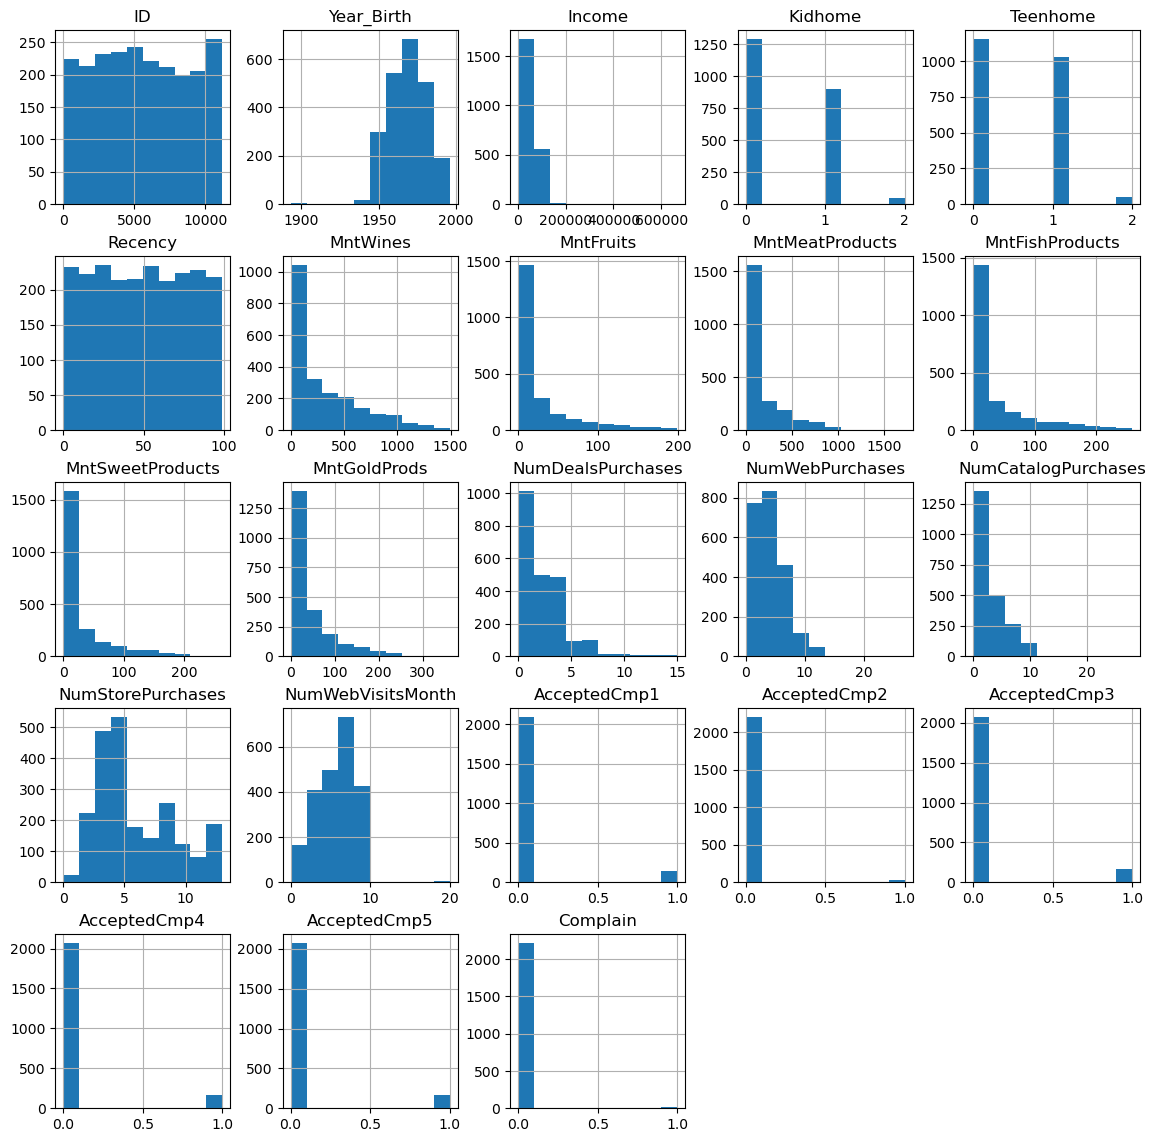

In [8]:
import matplotlib.pyplot as plt
# Creating histograms
df[num_cols].hist(figsize=(14,14))
plt.show()

# Univariate analysis for categorical variables

In [9]:
# Assuming your dataset is stored in a DataFrame called 'df'
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [10]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=False))
    print('*'*40)

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
****************************************
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
****************************************
2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-08-05     1
2012-11-18     1
2013-05-25     1
2013-04-14     1
2014-01-09     1
Name: Dt_Customer, Length: 663, dtype: int64
****************************************
No     1906
Yes     334
Name: Response, dtype: int64
****************************************


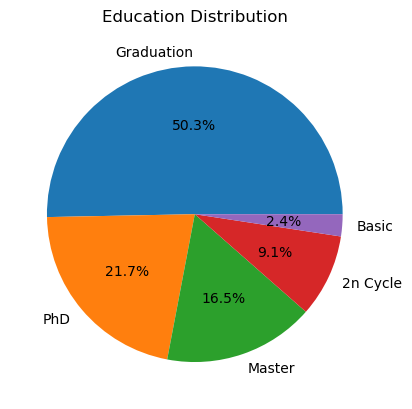

In [11]:
import matplotlib.pyplot as plt

education_counts = df['Education'].value_counts()

# Plotting the pie chart
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%')
plt.title('Education Distribution')

plt.show()

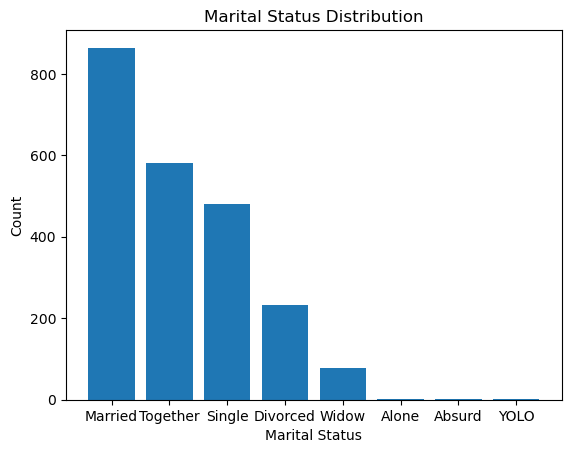

In [12]:
marital_counts = df['Marital_Status'].value_counts()

# Plotting the bar chart
plt.bar(marital_counts.index, marital_counts.values)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')

plt.show()

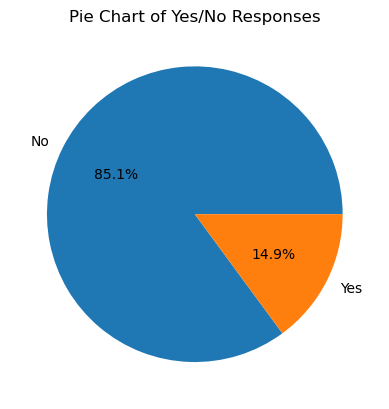

In [13]:
response_counts = df['Response'].value_counts()

# Plotting the pie chart
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Yes/No Responses')

plt.show()


In [14]:
X = df.drop(['Response'],axis=1)
y = df['Response'].values.reshape(-1, 1)

# Label Encoding

In [15]:
#Identify the column with non-numerical values

objList = X.select_dtypes(include = "object").columns
print(objList)

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')


In [16]:
# label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    X[feat] = le.fit_transform(X[feat].astype(str))
    
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   int32  
 3   Marital_Status       2240 non-null   int32  
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   int32  
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [17]:
X_df = pd.DataFrame(X)

In [18]:
X_df.head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain
0,5524,1957,2,4,58138.000000,0,0,36,58,635,...,8,10,4,7,0,0,0,0,0,0
1,2174,1954,2,4,46344.000000,1,1,555,38,11,...,1,1,2,5,0,0,0,0,0,0
2,4141,1965,2,5,71613.000000,0,0,369,26,426,...,8,2,10,4,0,0,0,0,0,0
3,6182,1984,2,5,26646.000000,1,0,531,26,11,...,2,0,4,6,0,0,0,0,0,0
4,5324,1981,4,3,58293.000000,1,0,510,94,173,...,5,3,6,5,0,0,0,0,0,0
5,7446,1967,3,5,62513.000000,0,1,386,16,520,...,6,4,10,6,0,0,0,0,0,0
6,965,1971,2,2,55635.000000,0,1,102,34,235,...,7,3,7,6,0,0,0,0,0,0
7,6177,1985,4,3,33454.000000,1,0,268,32,76,...,4,0,4,8,0,0,0,0,0,0
8,4855,1974,4,5,30351.000000,1,0,296,19,14,...,3,0,2,9,0,0,0,0,0,0
9,5899,1950,4,5,5648.000000,1,1,560,68,28,...,1,0,0,20,0,0,1,0,0,0


In [19]:
X = X_df.iloc[:, :].values

# Using ANN

C:\Users\engrd\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Average loss for the first 3000 iterations: 0.06127967516030645
Test Accuracy: 84.15178571428571%


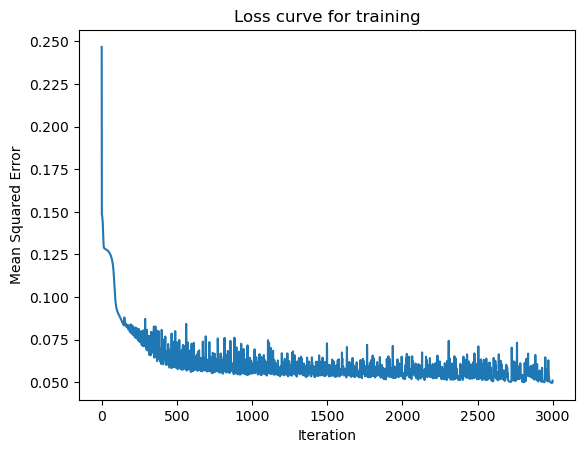

In [22]:
# Imports 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Define transfer function  and derivative
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

# Define loss function 
def mean_squared_error(actual, predicted):
    return np.mean(np.square(actual - predicted))

# Define plot loss curve
def plot_loss(loss):
    plt.plot(loss)
    plt.xlabel("Iteration")
    plt.ylabel("Mean Squared Error")
    plt.title("Loss curve for training")
    plt.show()  

# Define Neural Network Class 
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.randn(self.input.shape[1], 4)
        self.weights2 = np.random.randn(4, 8)
        self.weights3 = np.random.randn(8, 6)
        self.weights4 = np.random.randn(6, 4)
        self.weights5 = np.random.randn(4, 2)
        self.y = y
        self.output = np.zeros(self.y.shape)
        self.lr = 0.01  # learning rate
        
    def forwardprop(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        self.layer3 = sigmoid(np.dot(self.layer2, self.weights3))
        self.layer4 = sigmoid(np.dot(self.layer3, self.weights4))
        self.output = sigmoid(np.dot(self.layer4, self.weights5))
        
    def backprop(self):
        delta5 = 2 * (self.y - self.output) * sigmoid_derivative(self.output)
        d_weights5 = np.dot(self.layer4.T, delta5)
        
        delta4 = np.dot(delta5, self.weights5.T) * sigmoid_derivative(self.layer4)
        d_weights4 = np.dot(self.layer3.T, delta4)
        
        delta3 = np.dot(delta4, self.weights4.T) * sigmoid_derivative(self.layer3)
        d_weights3 = np.dot(self.layer2.T, delta3)
        
        delta2 = np.dot(delta3, self.weights3.T) * sigmoid_derivative(self.layer2)
        d_weights2 = np.dot(self.layer1.T, delta2)
        
        delta1 = np.dot(delta2, self.weights2.T) * sigmoid_derivative(self.layer1)
        d_weights1 = np.dot(self.input.T, delta1)
        
        # update the weights with the derivative (slope) of the loss function times lr
        self.weights1 += self.lr * d_weights1
        self.weights2 += self.lr * d_weights2
        self.weights3 += self.lr * d_weights3
        self.weights4 += self.lr * d_weights4
        self.weights5 += self.lr * d_weights5

    def predict(self, X):
        self.input = X
        self.forwardprop()
        return self.output

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One hot encode labels
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=100)

# Initiate the Neural Network with training data
nn = NeuralNetwork(X_train, y_train)

# Train through 3000 iterations 
loss = []
for i in range(3000):
    nn.forwardprop()
    nn.backprop()
    loss.append(mean_squared_error(nn.y, nn.output))

# Compute average loss for first 3000 iterations
if len(loss) >= 3000:
    avg_loss_first_3000 = sum(loss[:3000]) / 3000
    print(f"Average loss for the first 3000 iterations: {avg_loss_first_3000}")

# Print out the final output of the network on the training data
#print(nn.output)

# Calculate accuracy on the test data
test_output = nn.predict(X_test)
predictions = np.argmax(test_output, axis=1)
actual = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == actual)
print(f"Test Accuracy: {accuracy * 100}%")

# Plot the loss over time
plot_loss(loss)


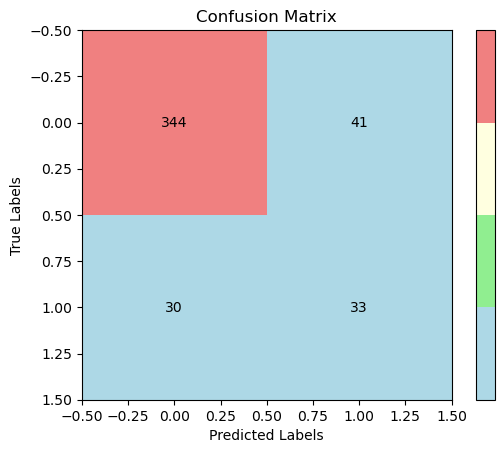

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Compute the confusion matrix
cm = confusion_matrix(actual, predictions)

# Define a custom colormap with four colors
cmap_colors = plt.cm.colors.ListedColormap(['lightblue', 'lightgreen', 'lightyellow', 'lightcoral'])

# Plot the confusion matrix with the custom colormap
plt.imshow(cm, cmap=cmap_colors)
plt.title('Confusion Matrix')
plt.colorbar(ticks=[0, 1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add labels to the cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()


In [24]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split

In [25]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100, stratify=y)

In [26]:
X_train.shape

(1792, 26)

In [27]:
X_test.shape

(448, 26)

# K-NN Algorithm

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train) 

print("Training Accuracy", knn.score(X_train,y_train))
print("Testing Accuracy", knn.score(X_test,y_test))

C:\Users\engrd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training Accuracy 0.9129464285714286
Testing Accuracy 0.8705357142857143


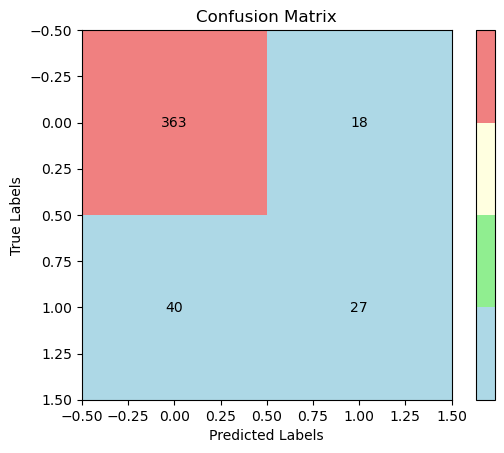

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Calculate the predicted labels
y_pred = knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define a custom colormap with four colors
cmap_colors = plt.cm.colors.ListedColormap(['lightblue', 'lightgreen', 'lightyellow', 'lightcoral'])

# Plot the confusion matrix with the custom colormap
plt.imshow(cm, cmap=cmap_colors)
plt.title('Confusion Matrix')
plt.colorbar(ticks=[0, 1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add labels to the cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()


# Decision Tree Algorithm

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy",max_depth=5)
#tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.892
Accuracy on testing set: 0.871


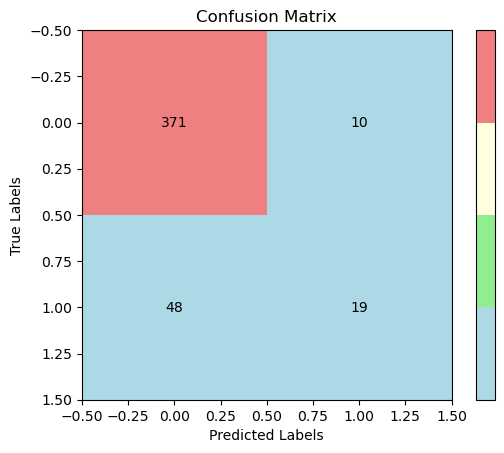

In [31]:
# Calculate the predicted labels
y_pred = tree.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define a custom colormap with four colors
cmap_colors = plt.cm.colors.ListedColormap(['lightblue', 'lightgreen', 'lightyellow', 'lightcoral'])

# Plot the confusion matrix with the custom colormap
plt.imshow(cm, cmap=cmap_colors)
plt.title('Confusion Matrix')
plt.colorbar(ticks=[0, 1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add labels to the cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

In [32]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.02042194 0.         0.         0.         0.05264653 0.
 0.         0.2029172  0.16350492 0.         0.         0.07587723
 0.         0.04096138 0.         0.         0.01381029 0.02466723
 0.         0.         0.02171997 0.         0.15754601 0.
 0.22592729 0.        ]


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, y_train)
print("LR Training Accuracy:",lr.score(X_train, y_train))
print("LR Testing Accuracy:",lr.score(X_test, y_test))

LR Training Accuracy: 0.8895089285714286
LR Testing Accuracy: 0.8928571428571429


C:\Users\engrd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


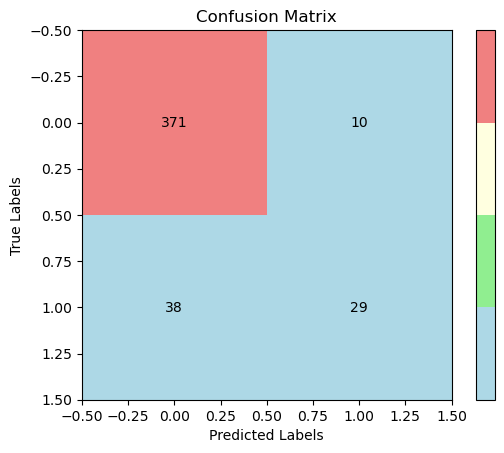

In [34]:
# Calculate the predicted labels
y_pred = lr.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define a custom colormap with four colors
cmap_colors = plt.cm.colors.ListedColormap(['lightblue', 'lightgreen', 'lightyellow', 'lightcoral'])

# Plot the confusion matrix with the custom colormap
plt.imshow(cm, cmap=cmap_colors)
plt.title('Confusion Matrix')
plt.colorbar(ticks=[0, 1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add labels to the cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

# Naive Bayesian : GAUSSIAN

In [35]:
from sklearn.naive_bayes import GaussianNB
GB = GaussianNB()

GB.fit(X_train, y_train)
print("GNB Training Accuracy:",GB.score(X_train, y_train))
print("GNB Testing Accuracy:",GB.score(X_test, y_test))

GNB Training Accuracy: 0.8264508928571429
GNB Testing Accuracy: 0.8147321428571429


C:\Users\engrd\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


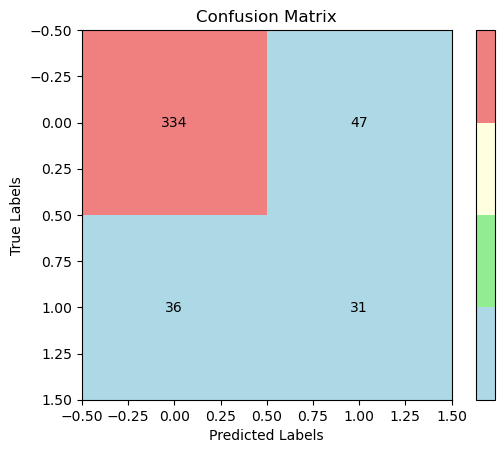

In [36]:
# Calculate the predicted labels
y_pred = GB.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define a custom colormap with four colors
cmap_colors = plt.cm.colors.ListedColormap(['lightblue', 'lightgreen', 'lightyellow', 'lightcoral'])

# Plot the confusion matrix with the custom colormap
plt.imshow(cm, cmap=cmap_colors)
plt.title('Confusion Matrix')
plt.colorbar(ticks=[0, 1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add labels to the cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

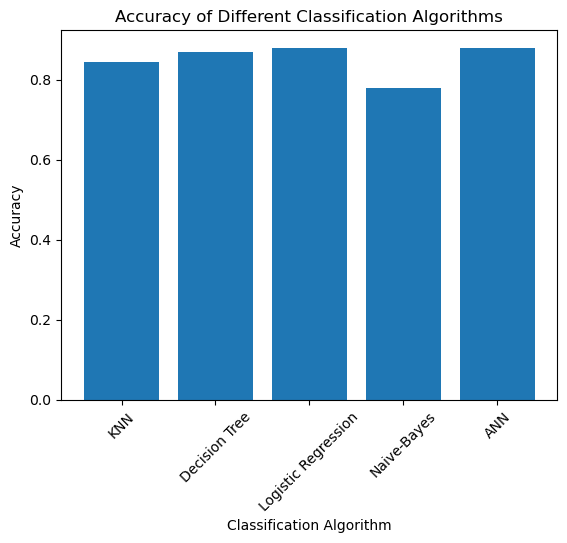

In [36]:
import matplotlib.pyplot as plt

# Assuming you have a list of accuracy scores for different algorithms
accuracy_scores = [0.84375, 0.868, 0.8794642857142857, 0.7790178571428571, 0.8795]

# Assuming you have a list of algorithm names corresponding to the accuracy scores
algorithm_names = ['KNN', 'Decision Tree', 'Logistic Regression', 'Naive-Bayes','ANN']

# Plotting the bar graph
plt.bar(algorithm_names, accuracy_scores)
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classification Algorithms')

plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better visibility

plt.show()
